Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino,identificacao_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()


4423680/4422102 [==============================] - 1s 0us/step


Explorando os dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacao_treino)
len(identificacoes_teste)
identificacao_treino.min()
identificacao_treino.max()

9

Exibindo os dados

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ["Camiseta","Calça", "Pullover", "Vestido",
                          "Casaco", "Sandália", "Camisa","Tênis",
                          "Bolsa","Bota"]

Text(0.5, 1.0, '9')

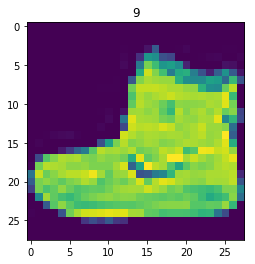

In [5]:
plt.imshow(imagens_treino[0])
plt.title(identificacao_treino[0])

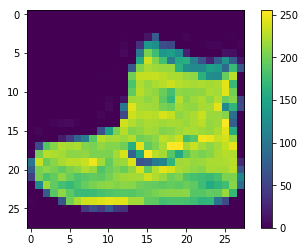

In [6]:
# for imagem in range(10):
#     plt.subplot(2,5,imagem+1)
#     plt.imshow(imagens_treino[imagem])
#     plt.title(nomes_de_classificacoes[identificacao_treino[imagem]])
    
plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [7]:
# Normalização
imagens_treino = imagens_treino/255.0

Criando, compilando e treinando e normalizando o modelo

In [8]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #camada 0 - Entrada
    keras.layers.Dense(256,activation=tensorflow.nn.relu), #camada 1 - Processamento
    keras.layers.Dropout(0.2),#camada 2 - Dropout
#     keras.layers.Dense(128,activation=tensorflow.nn.relu),
#     keras.layers.Dense(64,activation=tensorflow.nn.relu),
    keras.layers.Dense(10,activation=tensorflow.nn.softmax) #camada 3 - Saída
    
])

modelo.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy",metrics=["accuracy"])

historico = modelo.fit(imagens_treino, identificacao_treino,epochs=5,validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 119us/sample - loss: 0.5231 - acc: 0.8149 - val_loss: 0.4174 - val_acc: 0.8501
Epoch 2/5
48000/48000 [==============================] - 6s 117us/sample - loss: 0.3948 - acc: 0.8564 - val_loss: 0.3929 - val_acc: 0.8574
Epoch 3/5
48000/48000 [==============================] - 5s 114us/sample - loss: 0.3623 - acc: 0.8678 - val_loss: 0.3458 - val_acc: 0.8737
Epoch 4/5
48000/48000 [==============================] - 5s 114us/sample - loss: 0.3397 - acc: 0.8740 - val_loss: 0.3395 - val_acc: 0.8774
Epoch 5/5
48000/48000 [==============================] - 6s 117us/sample - loss: 0.3203 - acc: 0.8826 - val_loss: 0.3231 - val_acc: 0.8839


Salvando e carregando o modelo treinado

In [9]:
modelo.save("modelo_epochs5_nos3_no-gpu.h5")
modelo_salvo = load_model("modelo_epochs5_nos3_no-gpu.h5")

Visualizando as acurácias de treino e validação por época

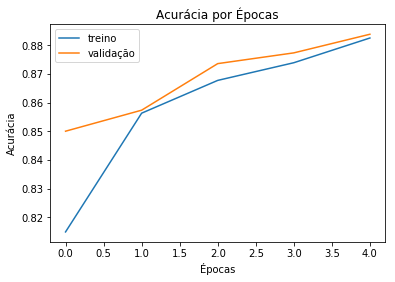

In [10]:
plt.plot(historico.history["acc"])
plt.plot(historico.history["val_acc"])
plt.title("Acurácia por Épocas")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend(["treino","validação"])

Se você perceber que a linha de treino está indo muito bem, enquanto a de teste está caindo, então terá um overfitting, ou seja, sua rede está entendendo o treino muito melhor do que a validação.

Visualizando as acurácias de treino e validação por época

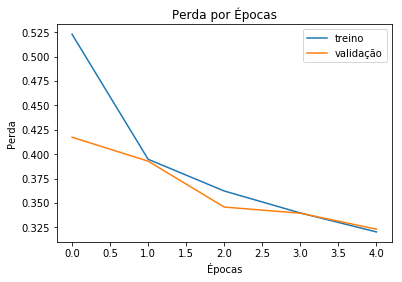

In [11]:
plt.plot(historico.history["loss"])
plt.plot(historico.history["val_loss"])
plt.title("Perda por Épocas")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend(["treino","validação"])

E também, na perda, se percebermos que o erro de teste está muito menor que o de validação, também deve ter algo a ser ajustado, porque estamos nesta situação de entendermos o treino bem demais.

Testando o modelo salvo

In [12]:
testes = modelo.predict(imagens_teste)
print("Resultado teste:",np.argmax(testes[1]))
print("Número da imagem de teste:", identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print("Resultado teste:",np.argmax(testes_modelo_salvo[1]))
print("Número da imagem de teste:", identificacoes_teste[1])

Resultado teste: 2
Número da imagem de teste: 2
Resultado teste: 2
Número da imagem de teste: 2


Avaliando o modelo

In [13]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste,identificacoes_teste)
print(f"Perda do teste: {perda_teste} e Acurácia do teste: {acuracia_teste}")

10000/10000 [==============================] - 0s 25us/sample - loss: 2.1336 - acc: 0.8647
Perda do teste: 2.133601630508597 e Acurácia do teste: 0.8647000193595886
